# Classify Iris Flowers

## Import libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import csv
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings

## Read Data

In [25]:
df=pd.read_csv("data/iris.csv",sep=",",encoding='utf-8')
df.head(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [26]:


# Drop the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Save the modified dataframe to a new CSV file
df.to_csv('data/iris.csv', index=False)


In [27]:
df.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
#Checking for null values
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Preprocessing

In [32]:
df.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [34]:
df["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [35]:
df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [37]:
df["Sepal.Length"]=df["Sepal.Length"].round(3)
df["Sepal.Width"]=df["Sepal.Width"].round(3)
df["Petal.Length"]=df["Petal.Length"].round(3)
df["Petal.Width"]=df["Petal.Width"].round(3)

## check Outliers

In [38]:
numerical_data = []
object_data = []

for column in df.columns:
    if df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

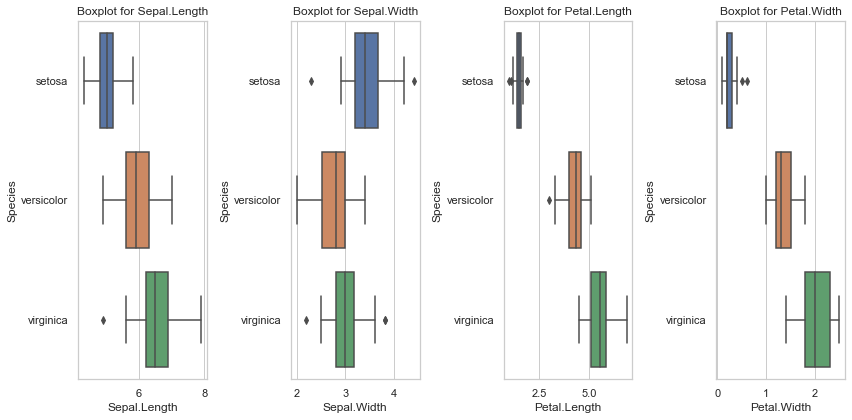

In [41]:
plt.figure(figsize=(12, 6))  # Increase figure size for better visibility
sns.set(style="whitegrid")   # Set the plot style

for i in range(len(numerical_data)):
    plt.subplot(1, len(numerical_data), i + 1)  
    sns.boxplot(x=numerical_data[i], y='Species', data=df, orient="h")
    plt.title(f'Boxplot for {numerical_data[i]}')
plt.tight_layout()  
plt.show()

## EDA

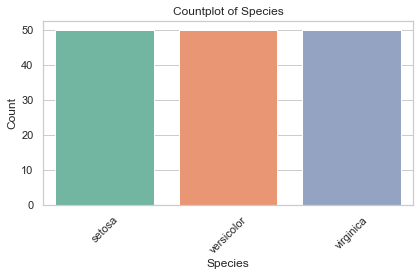

In [44]:
sns.countplot(data=df, x="Species", palette="Set2")  

plt.title("Countplot of Species") 
plt.xlabel("Species")  
plt.ylabel("Count")    

plt.xticks(rotation=45) 
plt.tight_layout()     

plt.show()

<AxesSubplot:xlabel='Sepal.Length', ylabel='Count'>

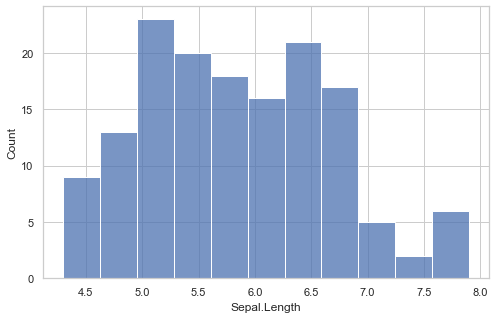

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Sepal.Length', bins=11)

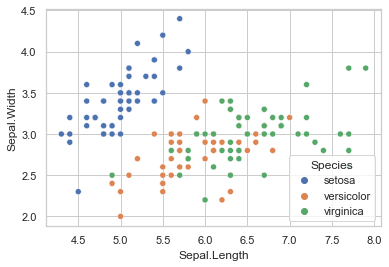

In [46]:
sns.scatterplot(x='Sepal.Length', y='Sepal.Width', hue='Species', data=df)
plt.show()


<AxesSubplot:xlabel='Sepal.Width', ylabel='Count'>

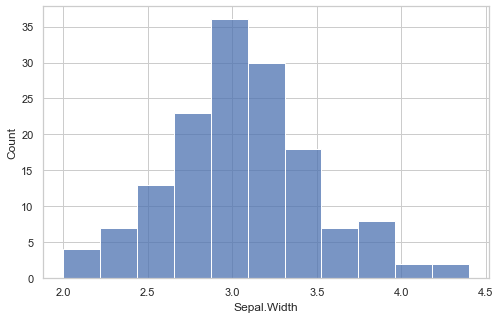

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Sepal.Width', bins=11)

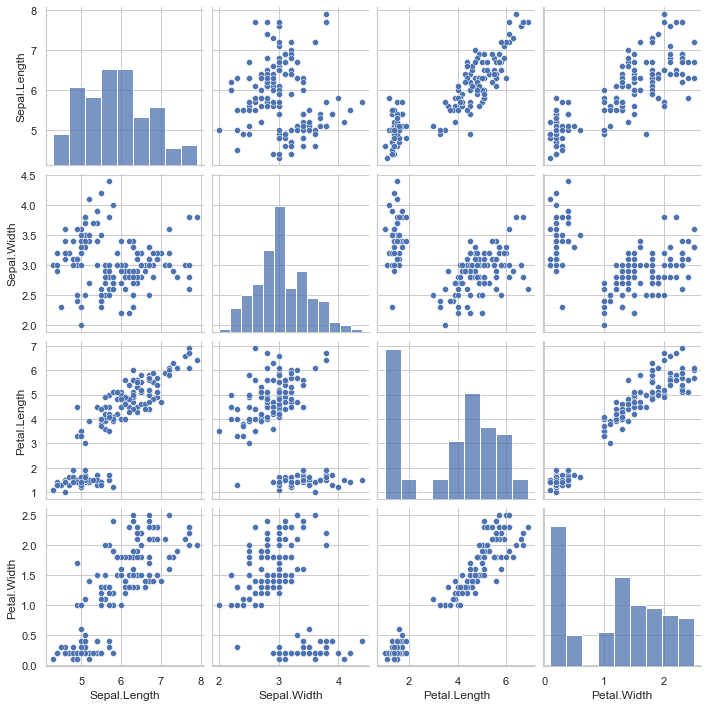

In [48]:
sns.pairplot(df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


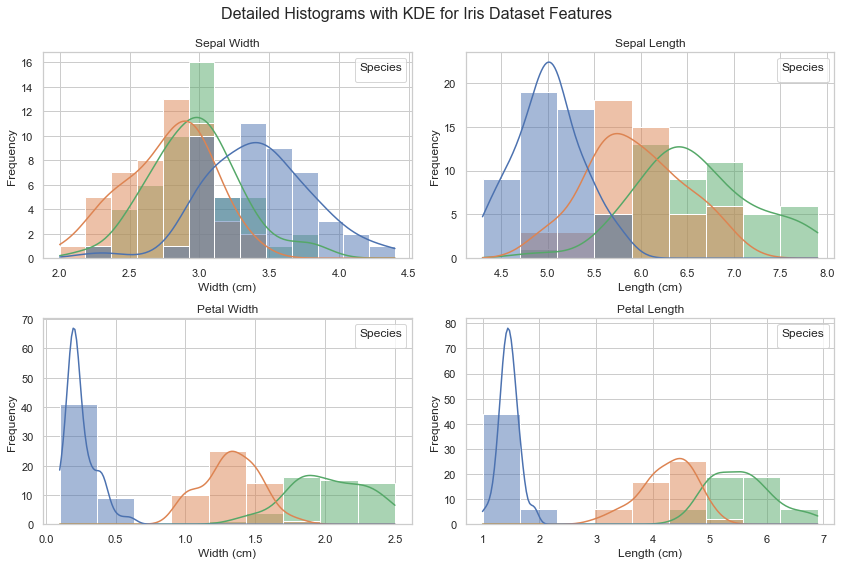

In [51]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Detailed Histograms with KDE for Iris Dataset Features", fontsize=16)

plot_settings = {
    "Sepal.Width": {"title": "Sepal Width", "xlabel": "Width (cm)"},
    "Sepal.Length": {"title": "Sepal Length", "xlabel": "Length (cm)"},
    "Petal.Width": {"title": "Petal Width", "xlabel": "Width (cm)"},
    "Petal.Length": {"title": "Petal Length", "xlabel": "Length (cm)"}
}

# Loop through features and create histograms
for i, feature in enumerate(plot_settings.keys()):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    
    # Create detailed histogram with KDE
    sns.histplot(data=df, x=feature, hue='Species', kde=True, ax=ax)
    
    # Set individual plot titles and labels
    ax.set_title(plot_settings[feature]["title"])
    ax.set_xlabel(plot_settings[feature]["xlabel"])
    ax.set_ylabel("Frequency")
    
    # Add legend outside the plot
    ax.legend(loc='upper right', title='Species')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

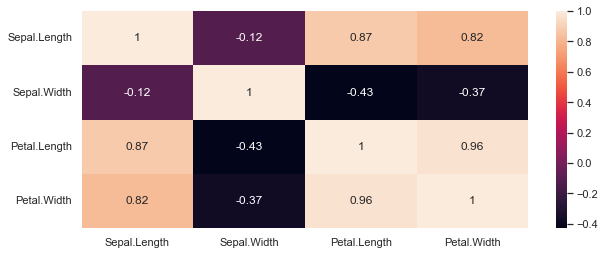

In [52]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
plt.show

## Machine Learning Model

### Split The Data

In [53]:
X = df.drop(['Species',"Sepal.Width"],axis=1)
y = df['Species']

### Scalling

In [54]:
sc = StandardScaler()
X = sc.fit_transform(X)

### Random Forest

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
RF = RandomForestClassifier(n_estimators=100, random_state=42)  
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

1.0
1.0


In [57]:
y_pred_rf=RF.predict(X_test)
y_pred_rf

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype=object)

In [58]:
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [59]:
df=pd.DataFrame({"y_pred_rf":y_pred_rf,"y_test":y_test})
df

,y_pred_rf,y_test
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor
31,setosa,setosa
64,versicolor,versicolor
141,virginica,virginica
68,versicolor,versicolor
82,versicolor,versicolor
